In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

real = pd.read_csv('../Code/assets/real.csv')
fake = pd.read_csv('../Code/assets/fake.csv')

pd.DataFrame(real)
pd.DataFrame(fake)



,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...
...,...
19994,by hitting the referee
19995,and instead of assassinating him.. they assass...
19996,"honestly, the goalkeeper deal is not the best\..."
19997,haha goal and no bangura (:


In [7]:
# Add a 'Status' column to each dataframe
real['Status'] = 0
fake['Status'] = 1

# Concatenate the two dataframes
combined = pd.concat([real, fake], ignore_index=True)
print(combined)
# Save the combined dataframe to an Excel file
combined.to_csv('combined.csv', index=False)

                                                   tweet  Status
0      sun downs technical director: al-ahly respecte...       0
1      shawky gharib after the tie with enppi: our go...       0
2      egyptian sports news today, wednesday 1/25/202...       0
3      the main referees committee of the egyptian fo...       0
4      haji bari, the striker of the future team, is ...       0
...                                                  ...     ...
41863                             by hitting the referee       1
41864  and instead of assassinating him.. they assass...       1
41865  honestly, the goalkeeper deal is not the best\...       1
41866                        haha goal and no bangura (:       1
41867  i swear by god almighty\nmessi will not come t...       1

[41868 rows x 2 columns]


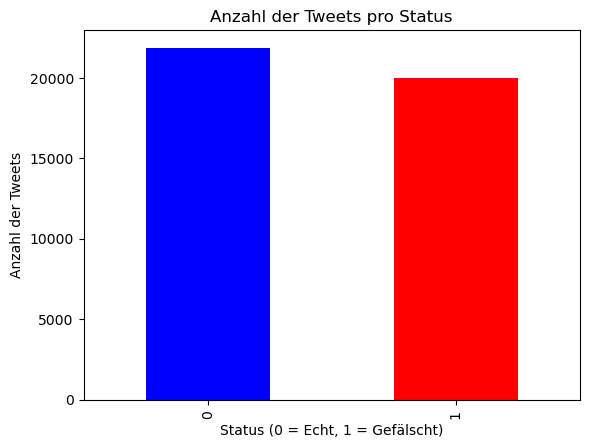

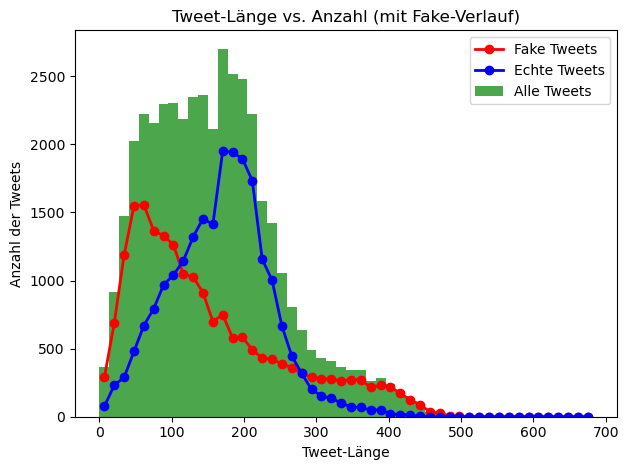

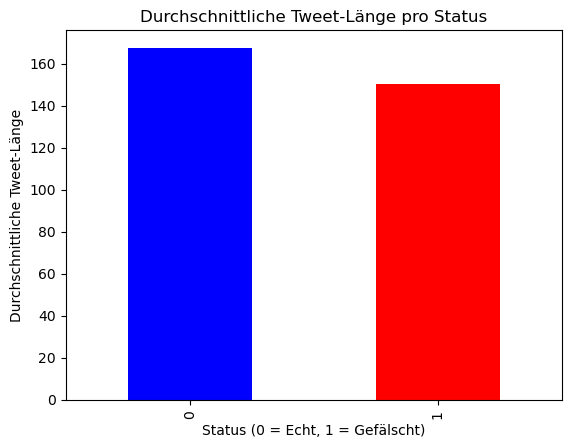

In [9]:
# Anzahl der Tweets pro Status (echt vs. gefälscht)
combined['Status'].value_counts().plot(kind='bar', color=['blue', 'red'], title='Anzahl der Tweets pro Status')
plt.xlabel('Status (0 = Echt, 1 = Gefälscht)')
plt.ylabel('Anzahl der Tweets')
plt.show()

# Sicherstellen, dass Tweet-Länge berechnet ist und NaN-Werte behandeln
combined['tweet_length'] = combined['tweet'].str.len()
combined['tweet_length'] = combined['tweet_length'].fillna(0)  # Fülle NaN-Werte mit 0

# Histogramm für ALLE Tweets
counts_all, bins = np.histogram(combined['tweet_length'], bins=50)

# Histogramm für NUR Fake-Tweets
counts_fake, _ = np.histogram(combined[combined['Status'] == 1]['tweet_length'], bins=bins)
# Histogramm für NUR echte Tweets
counts_real, _ = np.histogram(combined[combined['Status'] == 0]['tweet_length'], bins=bins)

# Mittelpunkt der Bins berechnen
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Plotten
plt.bar(bin_centers, counts_all, width=(bins[1] - bins[0]), color='green', alpha=0.7, label='Alle Tweets')
plt.plot(bin_centers, counts_fake, color='red', linewidth=2, marker='o', label='Fake Tweets')
plt.plot(bin_centers, counts_real, color='blue', linewidth=2, marker='o', label='Echte Tweets')

# Dekoration
plt.title('Tweet-Länge vs. Anzahl (mit Fake-Verlauf)')
plt.xlabel('Tweet-Länge')
plt.ylabel('Anzahl der Tweets')
plt.legend()
plt.tight_layout()
plt.show()


# Durchschnittliche Tweet-Länge pro Status
combined.groupby('Status')['tweet_length'].mean().plot(kind='bar', color=['blue', 'red'], title='Durchschnittliche Tweet-Länge pro Status')
plt.xlabel('Status (0 = Echt, 1 = Gefälscht)')
plt.ylabel('Durchschnittliche Tweet-Länge')

plt.show()

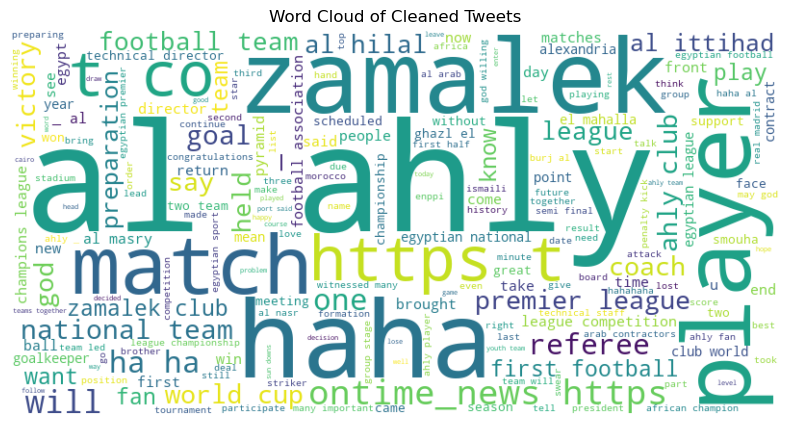

In [10]:
from wordcloud import WordCloud

# Combine all tweets into a single string
all_text = ' '.join(combined['tweet'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweets')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Angenommen, 'combined' enthält die Tweets und die 'status'-Spalte

# Schritt 1: Berechne die Tweet-Länge
combined['tweet_length'] = combined['tweet'].str.len()

# Schritt 2: Feature und Target definieren
X = combined[['tweet_length']]  # Feature: Tweet-Längen
y = combined['Status']  # Target: Fake (1) oder Real (0)

# Schritt 3: Daten in Trainings- und Testset aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Schritt 4: Merkmale standardisieren (optional, aber oft hilfreich bei KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Schritt 5: KNN-Modell erstellen und trainieren
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors ist die Anzahl der nächsten Nachbarn
knn.fit(X_train_scaled, y_train)

# Schritt 6: Vorhersagen machen
y_pred = knn.predict(X_test_scaled)

# Schritt 7: Modell bewerten
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'sklearn'